In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,\
                            accuracy_score
from sklearn import model_selection
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

import shap
from lime.lime_tabular import LimeTabularExplainer

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [442]:
data = pd.read_csv('2_bookings.csv', sep = ';')
data.head()

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


### EDA

In [445]:
data.shape

(119390, 21)

In [447]:
data.dtypes

Hotel                         object
Is Canceled                    int64
Lead Time                      int64
arrival full date             object
Arrival Date Year              int64
Arrival Date Month            object
Arrival Date Week Number       int64
Arrival Date Day of Month      int64
Stays in Weekend nights        int64
Stays in week nights           int64
stays total nights             int64
Adults                         int64
Children                     float64
Babies                         int64
Meal                          object
Country                       object
Reserved Room Type            object
Assigned room type            object
customer type                 object
Reservation Status            object
Reservation status_date       object
dtype: object

In [449]:
data.describe()

,Is Canceled,Lead Time,Arrival Date Year,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,stays total nights,Adults,Children,Babies
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,3.427900,1.856403,0.103890,0.007949
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,2.557439,0.579261,0.398561,0.097436
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,4.000000,2.000000,0.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,69.000000,55.000000,10.000000,10.000000


In [451]:
data.isna().sum()

Hotel                          0
Is Canceled                    0
Lead Time                      0
arrival full date              0
Arrival Date Year              0
Arrival Date Month             0
Arrival Date Week Number       0
Arrival Date Day of Month      0
Stays in Weekend nights        0
Stays in week nights           0
stays total nights             0
Adults                         0
Children                       4
Babies                         0
Meal                           0
Country                      488
Reserved Room Type             0
Assigned room type             0
customer type                  0
Reservation Status             0
Reservation status_date        0
dtype: int64

In [453]:
data = data.drop(columns = 'Country')

In [455]:
data.Children = data.Children.fillna(data.Children.median())

In [457]:
data.duplicated().sum()

39162

In [459]:
data = data.drop_duplicates()

In [461]:
data.duplicated().sum()

0

In [463]:
def rename_columns(columns):
    new_column = columns.lower().replace(' ', '_')
    return new_column

In [465]:
data = data.rename(columns = rename_columns)
data.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,meal,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,2,0.0,0,BB,A,A,Transient,Check-Out,2015-07-03


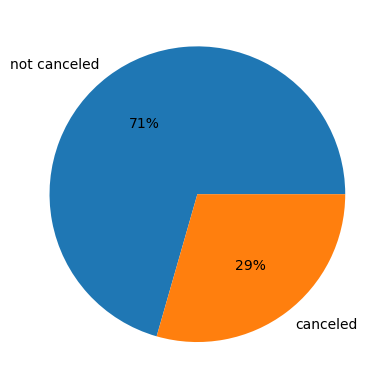

In [379]:
canceled = data.is_canceled.value_counts(normalize = True)
canceled.index = ['not canceled','canceled']
plt.pie(x = canceled, labels = canceled.index, autopct='%.0f%%')
plt.show()

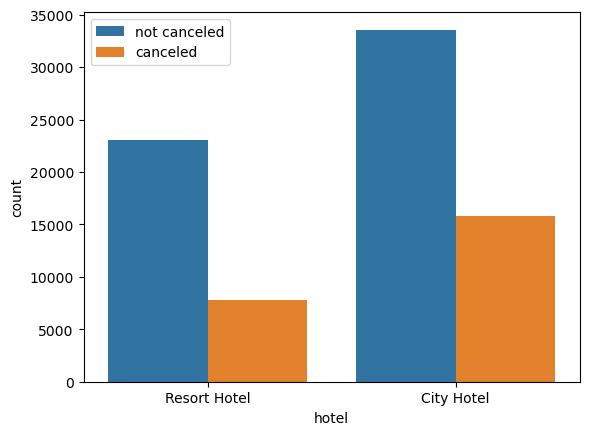

In [381]:
sns.countplot(data = data, x = 'hotel', hue = 'is_canceled')
plt.legend(['not canceled', 'canceled'])
plt.show()

In [383]:
data = data.drop(['arrival_full_date','reservation_status_date'], axis = 1)

In [385]:
le = LabelEncoder()

In [424]:
for i in list(data.select_dtypes('object').columns):
    data[i] = le.fit_transform(data[i])

In [426]:
data.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,meal,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,1,0,342,0,2015,5,27,1,0,0,0,2,0.0,0,0,2,2,2,1,121
1,1,0,737,0,2015,5,27,1,0,0,0,2,0.0,0,0,2,2,2,1,121
2,1,0,7,0,2015,5,27,1,0,1,1,1,0.0,0,0,0,2,2,1,122
3,1,0,13,0,2015,5,27,1,0,1,1,1,0.0,0,0,0,0,2,1,122
4,1,0,14,0,2015,5,27,1,0,2,2,2,0.0,0,0,0,0,2,1,123


In [428]:
data_columns = data.columns

In [430]:
n_scaler = MinMaxScaler()
data_norm = n_scaler.fit_transform(data)

data = pd.DataFrame(data_norm, columns = data_columns)
data.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,meal,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,1.0,0.0,0.464043,0.0,0.0,0.454545,0.5,0.0,0.0,0.00,0.000000,0.036364,0.0,0.0,0.0,0.222222,0.181818,0.666667,0.5,0.130811
1,1.0,0.0,1.000000,0.0,0.0,0.454545,0.5,0.0,0.0,0.00,0.000000,0.036364,0.0,0.0,0.0,0.222222,0.181818,0.666667,0.5,0.130811
2,1.0,0.0,0.009498,0.0,0.0,0.454545,0.5,0.0,0.0,0.02,0.014493,0.018182,0.0,0.0,0.0,0.000000,0.181818,0.666667,0.5,0.131892
3,1.0,0.0,0.017639,0.0,0.0,0.454545,0.5,0.0,0.0,0.02,0.014493,0.018182,0.0,0.0,0.0,0.000000,0.000000,0.666667,0.5,0.131892
4,1.0,0.0,0.018996,0.0,0.0,0.454545,0.5,0.0,0.0,0.04,0.028986,0.036364,0.0,0.0,0.0,0.000000,0.000000,0.666667,0.5,0.132973


### Сравнение методов машинного обучения + Оценка качества

In [45]:
X = data.drop(['is_canceled', 'reservation_status'], axis = 1)
y = data.is_canceled

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print(f'Accuracy: {round(accuracy_score(y_test, y_pred_logreg), 3) * 100} %')
print(classification_report(y_test, y_pred_logreg))

Accuracy: 71.2 %
              precision    recall  f1-score   support

         0.0       0.73      0.96      0.82     12540
         1.0       0.51      0.12      0.19      5111

    accuracy                           0.71     17651
   macro avg       0.62      0.54      0.51     17651
weighted avg       0.66      0.71      0.64     17651



In [60]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(f'KNN Accuracy: {round(accuracy_score(y_test, knnpred), 3)*100} ')
print(classification_report(y_test, knnpred))

KNN Accuracy: 66.10000000000001 
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76     12540
         1.0       0.42      0.45      0.43      5111

    accuracy                           0.66     17651
   macro avg       0.59      0.60      0.60     17651
weighted avg       0.67      0.66      0.66     17651



In [53]:
dtree_g = DecisionTreeClassifier()
dtree_g.fit(X_train, y_train)
dtree_g_pred = dtree_g.predict(X_test)

print(f'Decision Tree Classification(gini) Accuracy: {round(accuracy_score(y_test, dtree_g_pred), 2)*100}')
print(classification_report(y_test, dtree_g_pred))

Decision Tree Classification(gini) Accuracy: 66.0
              precision    recall  f1-score   support

         0.0       0.77      0.74      0.76     12540
         1.0       0.42      0.45      0.44      5111

    accuracy                           0.66     17651
   macro avg       0.59      0.60      0.60     17651
weighted avg       0.67      0.66      0.66     17651



In [55]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)
grad_boost_pred = grad_boost.predict(X_test)

print(f'Gradient Boosting Accuracy: {round(accuracy_score(y_test, grad_boost_pred), 2)*100}')
print(classification_report(y_test, grad_boost_pred))

Gradient Boosting Accuracy: 73.0
              precision    recall  f1-score   support

         0.0       0.73      0.97      0.83     12540
         1.0       0.64      0.13      0.22      5111

    accuracy                           0.73     17651
   macro avg       0.68      0.55      0.53     17651
weighted avg       0.70      0.73      0.66     17651



### Оптимизация гиперпараметров

In [58]:
neighbors_num = np.arange(0, 25)

acc_scores = []
for k in neighbors_num:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    acc_scores.append(scores.mean()*100)
    print(f"K: {k_value} Mean Accuracy: {round(scores.mean()*100, 3)}  std: {round(scores.std()*100, 3)}")

optimal_k = neighbors_num[acc_scores.index(max(acc_scores))]
print (f"The optimal number of neighbors is {optimal_k} with {round(acc_scores[optimal_k], 3)}")

K: 1 Mean Accuracy: 65.834  std: 0.543
K: 2 Mean Accuracy: 70.44  std: 0.565
K: 3 Mean Accuracy: 68.036  std: 0.553
K: 4 Mean Accuracy: 70.59  std: 0.493
K: 5 Mean Accuracy: 69.228  std: 0.568
K: 6 Mean Accuracy: 70.766  std: 0.546
K: 7 Mean Accuracy: 69.65  std: 0.627
K: 8 Mean Accuracy: 70.825  std: 0.516
K: 9 Mean Accuracy: 70.01  std: 0.466
K: 10 Mean Accuracy: 70.914  std: 0.529
K: 11 Mean Accuracy: 70.305  std: 0.565
K: 12 Mean Accuracy: 71.029  std: 0.509
K: 13 Mean Accuracy: 70.556  std: 0.533
K: 14 Mean Accuracy: 71.079  std: 0.573
K: 15 Mean Accuracy: 70.665  std: 0.577
K: 16 Mean Accuracy: 71.16  std: 0.632
K: 17 Mean Accuracy: 70.798  std: 0.684
K: 18 Mean Accuracy: 71.223  std: 0.661
K: 19 Mean Accuracy: 70.906  std: 0.545
K: 20 Mean Accuracy: 71.195  std: 0.527
K: 21 Mean Accuracy: 70.94  std: 0.584
K: 22 Mean Accuracy: 71.215  std: 0.587
K: 23 Mean Accuracy: 71.074  std: 0.556
K: 24 Mean Accuracy: 71.208  std: 0.527
K: 25 Mean Accuracy: 71.08  std: 0.481
The optimal numb

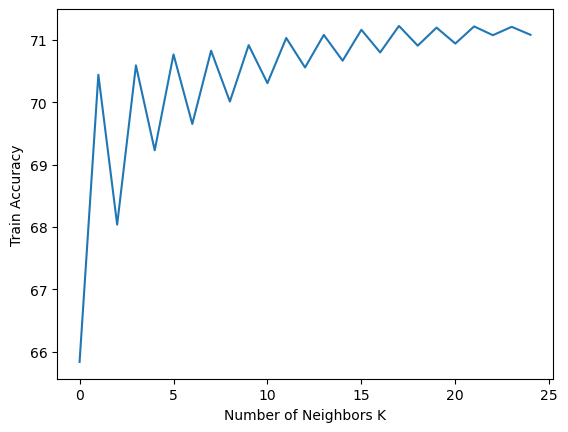

In [62]:
plt.plot(neighbors_num, acc_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [64]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(f'KNN Accuracy: {round(accuracy_score(y_test, knnpred), 3)*100} %')

KNN Accuracy: 71.39999999999999 %


In [130]:
params = [{'criterion':['gini'], 'min_samples_leaf':[5, 10, 20, 50, 100], 'max_depth':[5, 10, 20, 50, 100]}]
grid_search = GridSearchCV(estimator = dtree_g,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print(f'Accuracy: {round(best_accuracy, 2)*100}')
print(f'Best Parameters: {best_params}')

Accuracy: 72.0
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}


In [67]:
dtree_g = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = 10,
                                 min_samples_leaf = 20)
dtree_g.fit(X_train, y_train)
dtree_g_pred = dtree_g.predict(X_test)

print(f'Decision Tree Classification(gini) Accuracy: {round(accuracy_score(y_test, dtree_g_pred), 2)*100}')
print(classification_report(y_test, dtree_g_pred))

Decision Tree Classification(gini) Accuracy: 72.0
              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82     12540
         1.0       0.53      0.21      0.30      5111

    accuracy                           0.72     17651
   macro avg       0.64      0.57      0.56     17651
weighted avg       0.68      0.72      0.67     17651



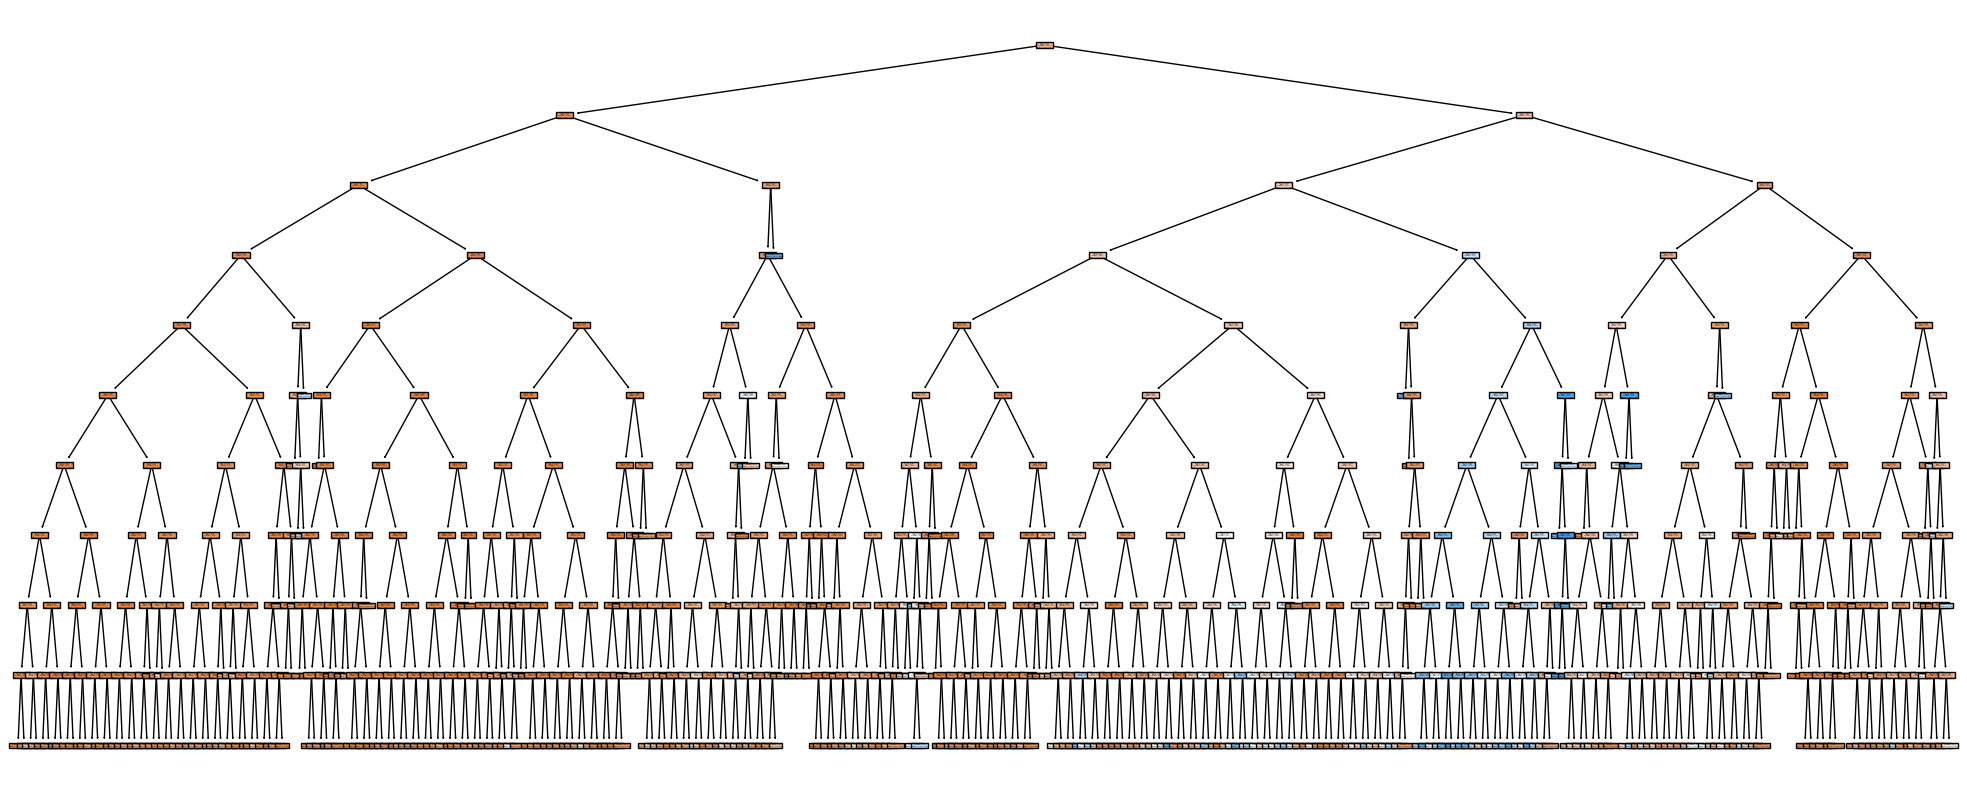

In [69]:
fig = plt.figure(figsize = (25,10))
tree.plot_tree(dtree_g, filled = True, proportion = True)
plt.show()

### Анализ важности признаков

In [71]:
explainer = shap.Explainer(grad_boost, X)
shap_values = explainer(X, check_additivity=False)

 99%|===================| 79791/80228 [01:35<00:00]        

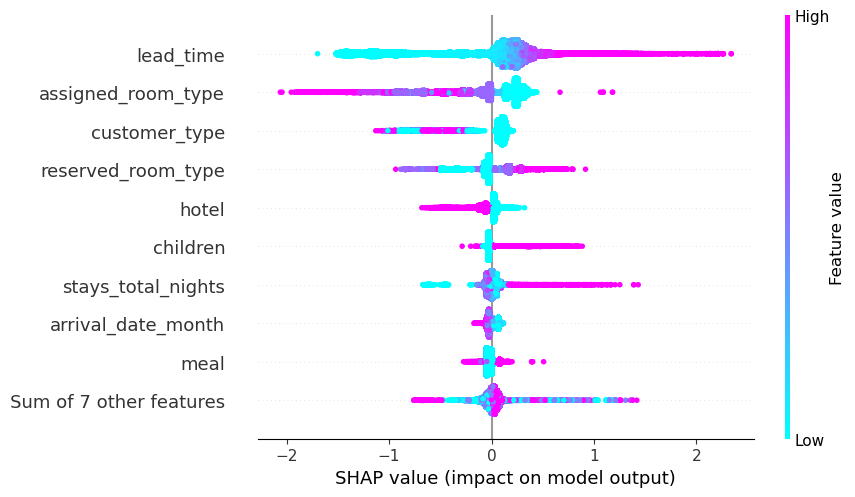

In [73]:
shap.plots.beeswarm(shap_values, color=plt.get_cmap("cool"))

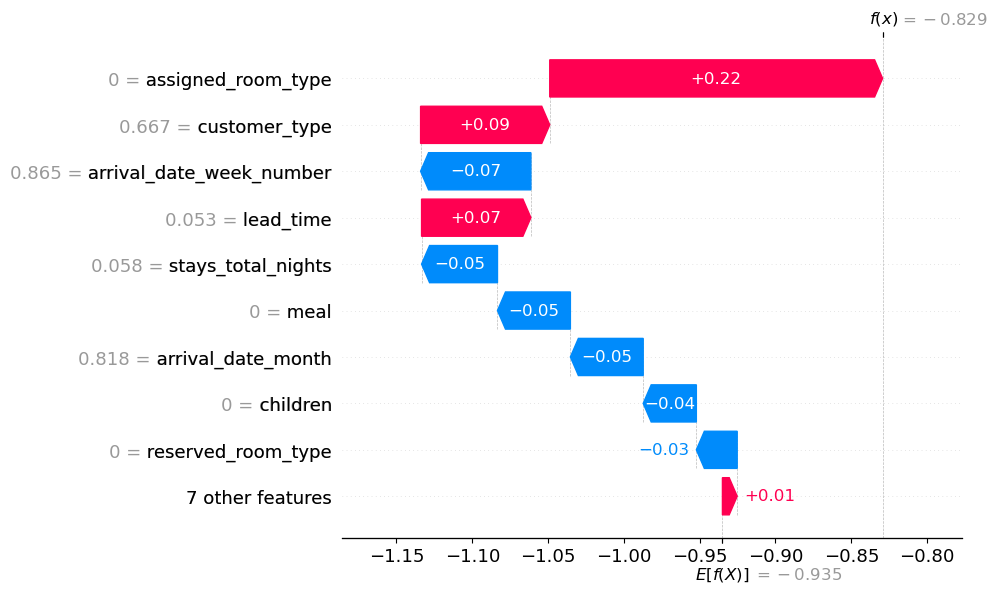

In [75]:
shap.plots.waterfall(shap_values[41000])

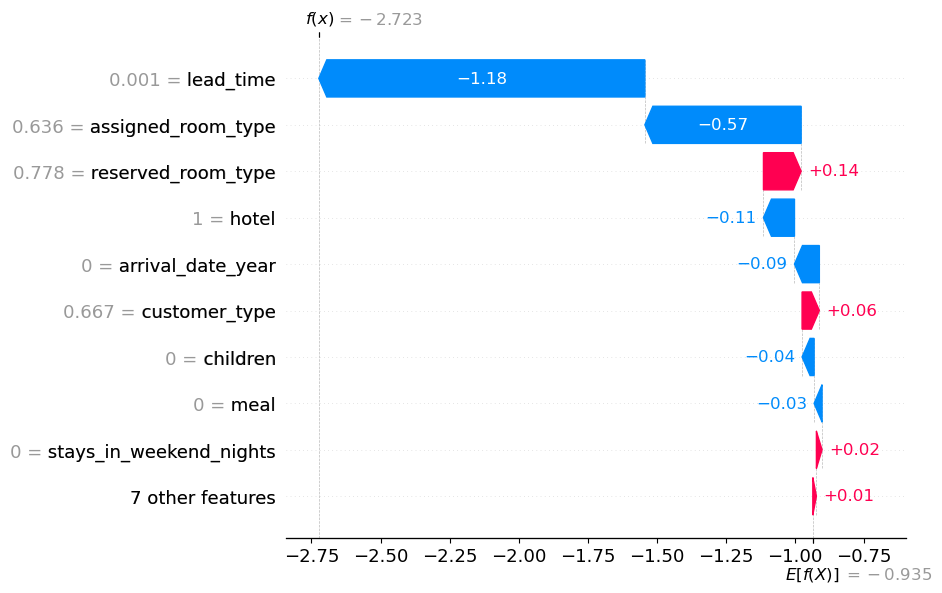

In [77]:
shap.plots.waterfall(shap_values[50])

In [79]:
features = X_train.columns.tolist()

explainer = LimeTabularExplainer(X_train.values, 
                                 feature_names = features, 
                                 class_names = ['not canceled', 'canceled'], 
                                 mode = 'classification')

In [81]:
instance = X_test.iloc[10]
explanation = explainer.explain_instance(instance.values, grad_boost.predict_proba, num_features = len(features))

explanation.show_in_notebook(show_table=True)

### Учет временной составляющей + Визуализация

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [469]:
# Преобразование дат в datetime
data['arrival_full_date'] = pd.to_datetime(data['arrival_full_date'])
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [471]:
# Агрегация данных по дням (количество отмен и общее количество бронирований)
daily_data = data.groupby('arrival_full_date').agg(
    total_bookings=('is_canceled', 'size'),
    cancellations=('is_canceled', 'sum')
).reset_index()

daily_data.head()

,arrival_full_date,total_bookings,cancellations
0,2015-07-01,51,11
1,2015-07-02,52,18
2,2015-07-03,49,19
3,2015-07-04,58,20
4,2015-07-05,51,15


In [473]:
# Расчет доли отмен
daily_data['cancellation_rate'] = daily_data['cancellations'] / daily_data['total_bookings']
daily_data.set_index('arrival_full_date', inplace=True)
daily_data.head()

,total_bookings,cancellations,cancellation_rate
arrival_full_date,,,
2015-07-01,51,11,0.215686
2015-07-02,52,18,0.346154
2015-07-03,49,19,0.387755
2015-07-04,58,20,0.344828
2015-07-05,51,15,0.294118


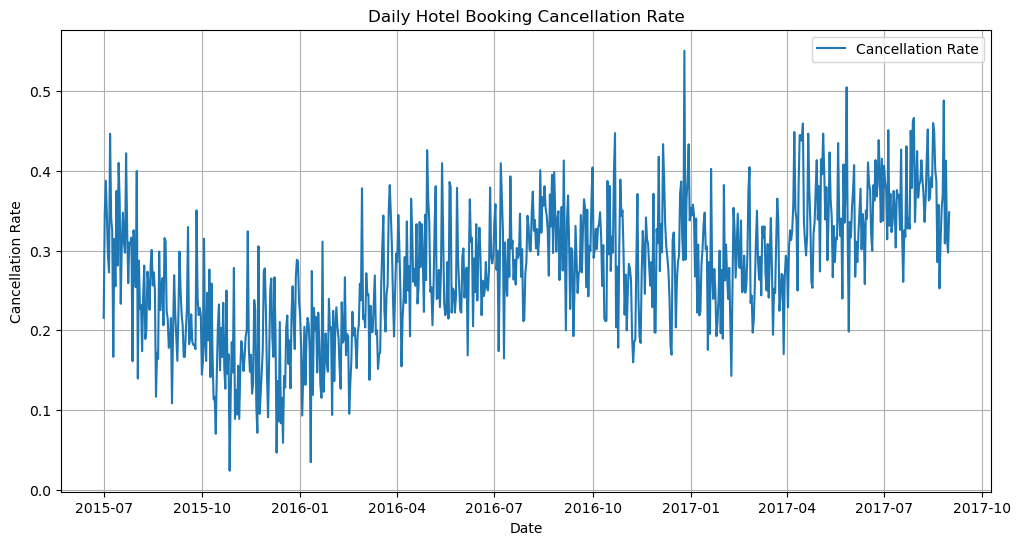

In [475]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['cancellation_rate'], label='Cancellation Rate')
plt.title('Daily Hotel Booking Cancellation Rate')
plt.xlabel('Date')
plt.ylabel('Cancellation Rate')
plt.legend()
plt.grid()
plt.show()

In [477]:
# Тест Дики-Фуллера
result = adfuller(daily_data['cancellation_rate'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.3339133175310216
p-value: 0.6135177002628474
Critical Values: {'1%': -3.4388489336836003, '5%': -2.865291103159288, '10%': -2.568767459327767}


In [479]:
# Если ряд не стационарен, применим дифференцирование
if result[1] > 0.05:
    daily_data['diff_rate'] = daily_data['cancellation_rate'].diff().dropna()
    result_diff = adfuller(daily_data['diff_rate'].dropna())
    print('After differencing:')
    print('ADF Statistic:', result_diff[0])
    print('p-value:', result_diff[1])

After differencing:
ADF Statistic: -11.041352245325573
p-value: 5.356047364468121e-20


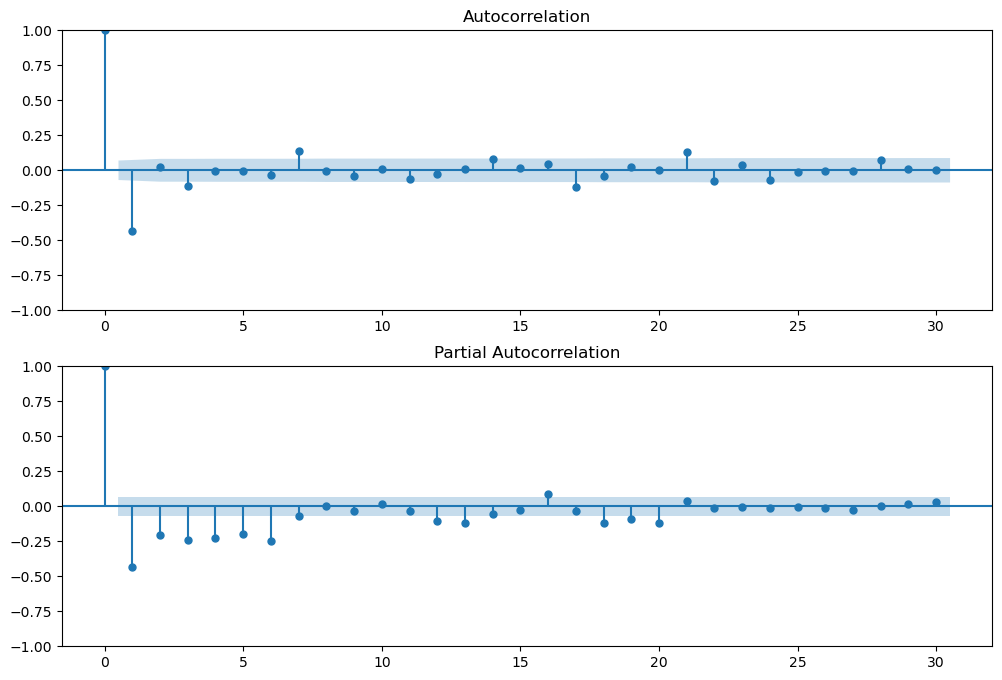

In [481]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(daily_data['diff_rate'].dropna(), lags=30, ax=ax1)
plot_pacf(daily_data['diff_rate'].dropna(), lags=30, ax=ax2)
plt.show()

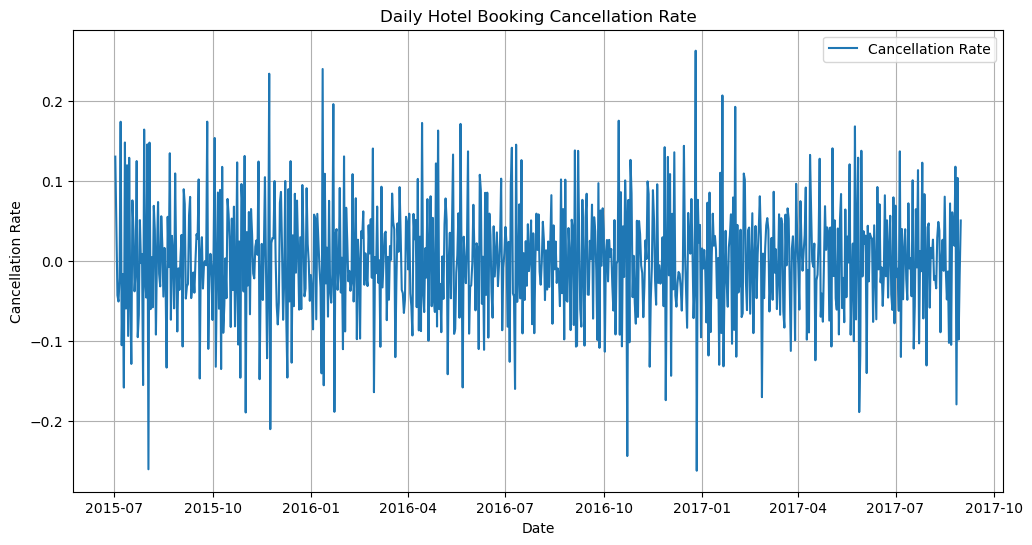

In [483]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['diff_rate'], label='Cancellation Rate')
plt.title('Daily Hotel Booking Cancellation Rate')
plt.xlabel('Date')
plt.ylabel('Cancellation Rate')
plt.legend()
plt.grid()
plt.show()

In [511]:
train_size = int(len(daily_data) * 0.8)
train, test = daily_data.iloc[:train_size], daily_data.iloc[train_size:]

order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 7)  # 7 дней в неделю

model = SARIMAX(train['diff_rate'],
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         diff_rate   No. Observations:                  634
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 798.263
Date:                           Sat, 12 Apr 2025   AIC                          -1586.526
Time:                                   22:46:15   BIC                          -1564.402
Sample:                               07-01-2015   HQIC                         -1577.925
                                    - 03-25-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4733      0.036    -12.991      0.000      -0.545      -0.402
ma.L1         -1.0000     35.957     -0.028

In [512]:
# Прогнозирование на тестовой выборке
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

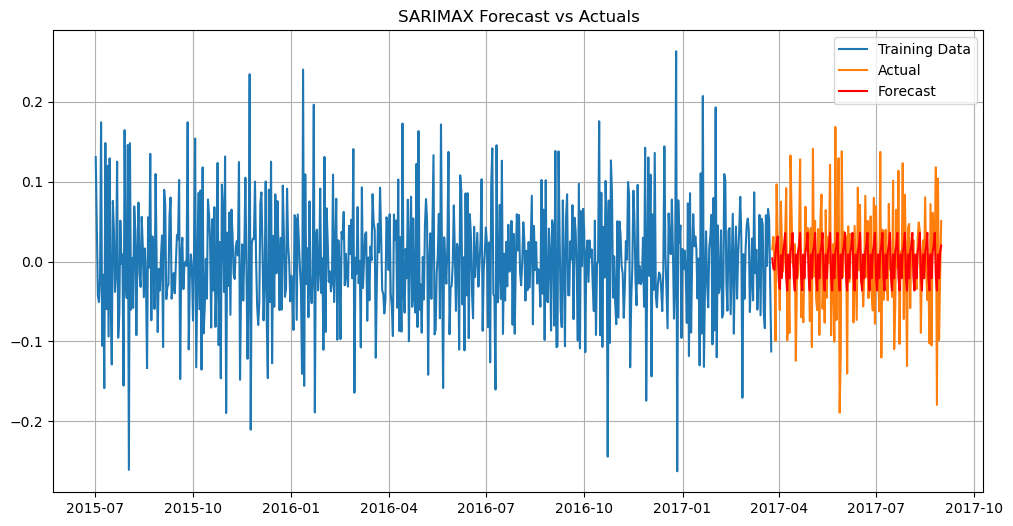

In [513]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['diff_rate'], label='Training Data')
plt.plot(test.index, test['diff_rate'], label='Actual')
plt.plot(test.index, forecast_mean, label='Forecast', color='red')
plt.title('SARIMAX Forecast vs Actuals')
plt.legend()
plt.grid()
plt.show()

In [519]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Расчет метрик
mse = mean_squared_error(test['diff_rate'], forecast_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['diff_rate'], forecast_mean)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

MSE: 0.0040
RMSE: 0.0632
MAE: 0.0496
